In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sln
from sklearn.manifold import TSNE
%matplotlib inline

In [0]:
train=pd.read_csv('/content/drive/My Drive/train.csv')

In [0]:
dummy=pd.get_dummies(train['financial_institution'],drop_first=True)

In [0]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [0]:
train_new=pd.read_csv('/content/drive/My Drive/new_features.csv')

In [0]:
tr=train_new.drop('4',axis=1)

In [0]:
tr=tr.drop('6',axis=1)

In [0]:
tr=tr.drop('7',axis=1)

In [0]:
tr_new=tr.drop('0',axis=1)

In [0]:
comb=pd.concat([tr_new,dummy],axis=1)

In [0]:
X = comb.values
Y = train['m13'].values

In [0]:
x, x_test, y, y_test = train_test_split(X,Y, test_size=0.3, random_state=42, stratify=Y)

In [0]:
from keras.models import Model,Sequential
from keras.layers import Input, Dense,Dropout,BatchNormalization
from keras import regularizers
from keras import optimizers

Using TensorFlow backend.


In [0]:
#sparse autoencoders


x = Input(shape=(X.shape[1],))

# Encoder
h = Dense(250, activation='relu', activity_regularizer=regularizers.l1(10e-5))(x)
h=Dropout(0.3)(h)

h=Dense(200, activation='relu', activity_regularizer=regularizers.l1(10e-5))(h)

h=BatchNormalization()(h)
# Decoder
r = Dense(X.shape[1], activation='tanh')(h)
r=BatchNormalization()(r)

autoencoder = Model(input=x, output=r)
autoencoder.compile(optimizer='adam', loss='mse')

W0822 20:53:46.974444 139676650620800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 20:53:46.999435 139676650620800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 20:53:47.005971 139676650620800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0822 20:53:47.029961 139676650620800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0822 20:53:47.041865 

In [0]:
autoencoder = Model(x,r)
autoencoder.compile(optimizer="adam", loss="mse")

In [0]:
x=x[y==0]

NameError: ignored

In [0]:
x_not, x_yes = X[Y == 0], X[Y == 1]

In [0]:
history=autoencoder.fit(x_not, x_not, 
        batch_size = 256, epochs = 10,
                        validation_split=0.2
               , shuffle = True)

W0822 20:54:00.682875 139676650620800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 92337 samples, validate on 23085 samples
Epoch 1/10
92337/92337 [==============================] - 5s 52us/step - loss: 0.3865 - val_loss: 0.3560
Epoch 2/10
92337/92337 [==============================] - 3s 37us/step - loss: 0.0457 - val_loss: 0.0443
Epoch 3/10
92337/92337 [==============================] - 3s 38us/step - loss: 0.0376 - val_loss: 0.0310
Epoch 4/10
92337/92337 [==============================] - 3s 37us/step - loss: 0.0341 - val_loss: 0.0433
Epoch 5/10
92337/92337 [==============================] - 3s 38us/step - loss: 0.0312 - val_loss: 0.0367
Epoch 6/10
92337/92337 [==============================] - 3s 37us/step - loss: 0.0283 - val_loss: 0.0670
Epoch 7/10
92337/92337 [==============================] - 3s 37us/step - loss: 0.0265 - val_loss: 0.0299
Epoch 8/10
92337/92337 [==============================] - 3s 37us/step - loss: 0.0252 - val_loss: 0.0415
Epoch 9/10
92337/92337 [==============================] - 3s 37us/step - loss: 0.0248 - val_loss: 0.0428
Epoch

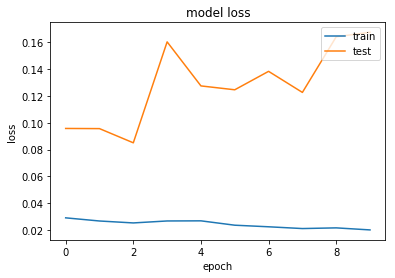

In [0]:
4plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [0]:
predictions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()


,reconstruction_error,true_class
count,34818.000000,34818.000000
mean,0.103854,0.005486
std,3.016259,0.073863
min,0.004931,0.000000
25%,0.011930,0.000000
50%,0.014846,0.000000
75%,0.019280,0.000000
max,291.786971,1.000000


Reconstruction with deliquency

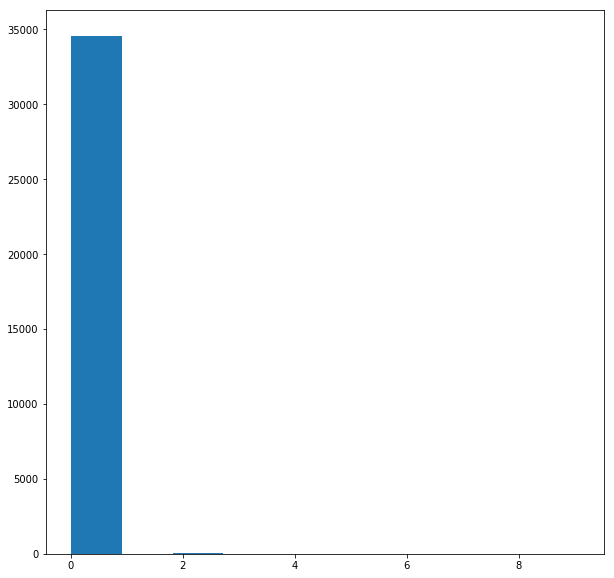

In [0]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

Reconstruction error with fraud

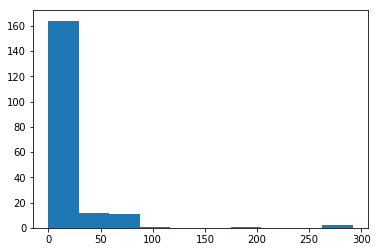

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)


In [0]:
threshold = 2#fixed
LABELS = ["Normal", "deliquent"]

Text(0.5, 87.0, 'Predicted')

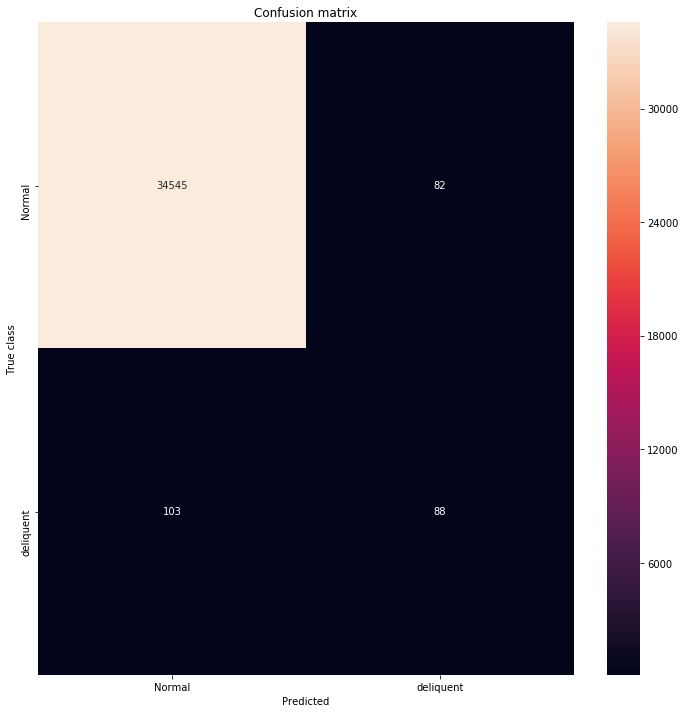

In [0]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sln.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted')

In [0]:
predicted=autoencoder.predict(te)

In [0]:
mse = np.mean(np.power(te - predicted, 2), axis=1)
error_test = pd.DataFrame({'reconstruction_error': mse})
                        

In [0]:
y_final = [1 if e > threshold else 0 for e in error_test.reconstruction_error.values]

In [0]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [0]:
no_hid_rep = hidden_representation.predict(x_not)
yes_hid_rep = hidden_representation.predict(x_yes)

In [0]:
rep_x = np.append(no_hid_rep, yes_hid_rep, axis = 0)
y_n = np.zeros(no_hid_rep.shape[0])
y_f = np.ones(yes_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)

In [0]:
def tsne_plot(x1, y1):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Not default')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='defaulted')

    plt.legend(loc='best');
    
    plt.show();
    

In [0]:
tsne_plot(rep_x, rep_y)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve
from sklearn.model_selection import KFold, StratifiedKFold,cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

In [0]:
x, x_test, y, y_test = train_test_split(rep_x, rep_y, test_size=0.3, random_state=42, stratify=rep_y)

In [0]:
#cv
n_folds = 3

def cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x)
    print('started')
    cv=cross_val_score(model, x, y, scoring="f1", cv = kf)
    print('done')
    return(cv.mean())

In [0]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
GBoost = GradientBoostingClassifier(n_estimators=2500, learning_rate=0.05,
                                 max_depth=5, max_features='sqrt',
                                 min_samples_leaf=15, min_samples_split=10, 
                               loss='deviance', random_state =5,warm_start=True)

In [0]:
lg=LogisticRegressionCV(class_weight='balanced',scoring='f1',cv=3)

In [0]:
#full data
from sklearn.linear_model import LogisticRegression
for c in [0.001,0.01,0.1,1,10,100,1000]:
  score=cv(LogisticRegression(C=c))
  print(score)

started
done
0.0
started
done
0.0
started
done
0.0
started
done
0.0
started
done
0.0
started
done
0.0
started
done
0.0


In [0]:
lr=LogisticRegression(C=10)
lr.fit(x,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

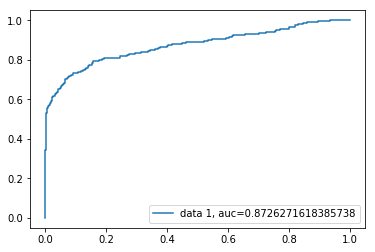

In [0]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [0]:
f1_score(y_test,lg.predict(x_test))

0.3434650455927052

In [0]:
GBoost.fit(x,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=15, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=3000,
                           n_iter_no_change=None, presort='auto',
                           random_state=5, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)

In [0]:
f1_score(y_test,stacked_averaged_models.predict(x_test))

0.7060998151571164

In [0]:
model_xgb = xgb.XGBClassifier(colsample_bylevel_tree=0.4603, gamma=0.0468, 
                         learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=2200,
                           reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1,scale_pos_weight=99)

In [0]:
rf=RandomForestClassifier(class_weight='balanced',max_features='sqrt',max_depth=4)

In [0]:
cv(model_xgb)

started
done


0.45838809474168113

In [0]:
model_xgb.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bylevel_tree=0.4603, colsample_bynode=1,
              colsample_bytree=1, gamma=0.0468, learning_rate=0.05,
              max_delta_step=0, max_depth=5, min_child_weight=1.7817,
              missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
              objective='binary:logistic', random_state=7, reg_alpha=0.464,
              reg_lambda=0.8571, scale_pos_weight=99, seed=None, silent=1,
              subsample=0.5213, verbosity=1)

In [0]:
f1_score(y_test,model_lgb.predict(x_test))

0.22805247225025227

In [0]:
model_lgb = lgb.LGBMClassifier(objective='binary',num_leaves=5,
                              learning_rate=0.01, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,
                             scale_pos_weight=99)

In [0]:
cv(model_lgb)

started
done


0.25797259460052924

In [0]:
model_lgb.fit(x,y)

LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.2319, feature_fraction_seed=9,
               importance_type='split', learning_rate=0.01, max_bin=55,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=6, min_split_gain=0.0,
               min_sum_hessian_in_leaf=11, n_estimators=720, n_jobs=-1,
               num_leaves=5, objective='binary', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=99, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
test_hidden=hidden_representation.predict(comb_test)

In [0]:
test=pd.read_csv('/content/drive/My Drive/new_features_test.csv')

In [0]:
te=test.drop('4',axis=1)

In [0]:
te=te.drop('6',axis=1)

In [0]:
te=te.drop('7',axis=1)

In [0]:
te.shape

(35866, 12)

In [0]:
te_final=te.drop('0',axis=1)

In [0]:
comb_test=pd.concat([te_final,dummy_test],axis=1)

In [0]:
test_orig=pd.read_csv('/content/drive/My Drive/test.csv')

In [0]:
dummy_test=pd.get_dummies(test_orig['financial_institution'],drop_first=True)

In [0]:
prob=lr.predict_proba(test_hidden)

In [0]:
y_pred=[1 if e>0.04 else 0 for e in  pr

In [0]:
predict=lr.predict(test_hidden)

In [0]:
my_sub=pd.DataFrame({'loan_id':test_orig['loan_id'],'m13':predict[:,0]})

In [0]:
my_sub['m13'].value_counts()

0    35825
1       41
Name: m13, dtype: int64

In [0]:
my_sub.to_csv('baseline_45.csv',index=False)

In [0]:
test_hidden.shape

(35866, 200)

In [0]:
#checking for covariate shift
train_new['is_train']=1
test['is_train']=0

In [0]:
df_combine = pd.concat([train_new, test], axis=0, ignore_index=True)

In [0]:
y_co = df_combine['is_train'].values #labels
x_co = df_combine.drop('is_train', axis=1).values 

In [0]:
cv(GBoost)

started
done


0.8325667891363594

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_jobs=-1, max_depth=5, min_samples_leaf = 5)

In [0]:
rf.fit(x_co,y_co)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
x_co.head()

AttributeError: ignored

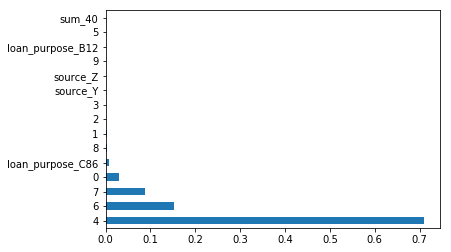

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=df_combine.drop('is_train',axis=1).columns)
feat_importances.nlargest(20).plot(kind='barh')

In [0]:
tr=train_new.drop('4',axis=1)
te=test.drop('4',axis=1)

In [0]:
df_combine.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'sum_40',
       'loan_purpose_B12', 'loan_purpose_C86', 'source_Y', 'source_Z',
       'is_train'],
      dtype='object')

In [0]:
# model_xgb = xgb.XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1,scale_pos_weight=95,seed=20)

Lets try stacked model

In [0]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [0]:
averaged_models = AveragingModels(models = (GBoost,model_xgb))

In [0]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)


In [0]:
stacked_averaged_models = StackingAveragedModels(base_models = (GBoost,model_xgb,rf),
                                                 meta_model = lg)

started
done
0.5089570929292698


In [0]:
 stacked_averaged_models.fit(rep_x, rep_y)

StackingAveragedModels(base_models=(GradientBoostingClassifier(criterion='friedman_mse',
                                                               init=None,
                                                               learning_rate=0.05,
                                                               loss='deviance',
                                                               max_depth=5,
                                                               max_features='sqrt',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=15,
                                                               min_samples_split=10,
                                                               min_weight_fraction_

In [0]:
#one class svm
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
model_svm = LinearSVC(C=0.01, tol=0.0001, verbose=1, random_state=1001, max_iter=2000, dual=False)

In [0]:
cv(model_svm)

started
[LibLinear][LibLinear][LibLinear]done


0.4676161504476835

In [0]:
sigmoid.fit(x,y)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

CalibratedClassifierCV(base_estimator=LinearSVC(C=0.01, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=2000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=1001, tol=0.0001,
                                                verbose=1),
                       cv=5, method='sigmoid')

In [0]:
f1_score(y_test,sigmoid.predict(x_test))

0.45692883895131087

In [0]:
 sigmoid = CalibratedClassifierCV(model_svm, cv=5, method='sigmoid')

In [0]:
cv(sigmoid)

started
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]done


0.4089576680709139

In [0]:
#neural networks
hidden_units=100
learning_rate=0.01
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=20

In [0]:
import numpy as np
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
class Metrics(Callback):
  def on_train_begin(self, logs={}):
    
  
  
    self.val_f1s = []

    self.val_recalls = []
    self.val_precisions = []

  def on_epoch_end(self, epoch, logs={}):
    
    
  
    val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).round()
    val_targ = self.validation_data[1]
    _val_f1 = f1_score(val_targ, val_predict)
    _val_recall = recall_score(val_targ, val_predict)
    _val_precision = precision_score(val_targ, val_predict)
    self.val_f1s.append(_val_f1)
    self.val_recalls.append(_val_recall)
    self.val_precisions.append(_val_precision)
    print (" — val_f1: %f — val_precision: %f — val_recall %f"%(_val_f1, _val_precision, _val_recall))
    return

metrics = Metrics()

In [0]:
model = Sequential()
model.add(Dense(300, input_dim=x.shape[1], activation=hidden_layer_act))
model.add(Dropout(0.3))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dropout(0.3))
model.add(Dense(1, activation=output_layer_act))
sgd=optimizers.SGD(lr=learning_rate)
model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['acc'])

In [0]:
model.fit(x, y, epochs=no_epochs, batch_size=256,  verbose=2,callbacks=[metrics],validation_data=(x_test,y_test))

Train on 81240 samples, validate on 34818 samples
Epoch 1/20
 - 2s - loss: 0.1644 - acc: 0.9936 - val_loss: 0.0518 - val_acc: 0.9945
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 2/20
 - 2s - loss: 0.0420 - acc: 0.9946 - val_loss: 0.0353 - val_acc: 0.9946
 — val_f1: 0.030928 — val_precision: 1.000000 — val_recall 0.015707
Epoch 3/20
 - 2s - loss: 0.0334 - acc: 0.9947 - val_loss: 0.0313 - val_acc: 0.9947
 — val_f1: 0.080402 — val_precision: 1.000000 — val_recall 0.041885
Epoch 4/20
 - 1s - loss: 0.0307 - acc: 0.9949 - val_loss: 0.0296 - val_acc: 0.9948
 — val_f1: 0.099502 — val_precision: 1.000000 — val_recall 0.052356
Epoch 5/20
 - 2s - loss: 0.0294 - acc: 0.9950 - val_loss: 0.0286 - val_acc: 0.9949
 — val_f1: 0.136585 — val_precision: 1.000000 — val_recall 0.073298
Epoch 6/20
 - 2s - loss: 0.0285 - acc: 0.9951 - val_loss: 0.0280 - val_acc: 0.9950
 — val_f1: 0.172249 — val_precision: 1.000000 — val_recall 0.094241
Epoch 7/20
 - 2s - loss: 0.0278 - acc: 0.995

In [0]:
predict=model.model.predict_classes(test_hidden)

In [0]:
predict[:,0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [0]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=1000, random_state=0,learning_rate=0.01)

In [0]:
cv(clf)

started
done


0.41361993767175265

ENOUGH OF AUTOENCODERS

In [0]:
comb.columns

Index(['1', '2', '3', '5', '8', '9', 'sum_40', 'loan_purpose_B12',
       'loan_purpose_C86', 'source_Y', 'source_Z', 'Browning-Hart',
       'Chapman-Mcmahon', 'Cole, Brooks and Vincent', 'Edwards-Hoffman',
       'Martinez, Duffy and Bird', 'Miller, Mcclure and Allen',
       'Nicholson Group', 'OTHER', 'Richards-Walters', 'Richardson Ltd',
       'Romero, Woods and Johnson', 'Sanchez, Hays and Wilkerson',
       'Sanchez-Robinson', 'Suarez Inc', 'Swanson, Newton and Miller',
       'Taylor, Hunt and Rodriguez', 'Thornton-Davis',
       'Turner, Baldwin and Rhodes'],
      dtype='object')

In [0]:
comb.describe()

,1,2,3,5,8,9,sum_40,loan_purpose_B12,loan_purpose_C86,source_Y,source_Z,Browning-Hart,Chapman-Mcmahon,"Cole, Brooks and Vincent",Edwards-Hoffman,"Martinez, Duffy and Bird","Miller, Mcclure and Allen",Nicholson Group,OTHER,Richards-Walters,Richardson Ltd,"Romero, Woods and Johnson","Sanchez, Hays and Wilkerson",Sanchez-Robinson,Suarez Inc,"Swanson, Newton and Miller","Taylor, Hunt and Rodriguez",Thornton-Davis,"Turner, Baldwin and Rhodes"
count,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,-6.918666e-16,-4.474163e-17,1.044304e-15,-4.810828e-14,4.258328e-17,6.875211e-14,0.000138,0.253175,0.243094,0.323580,0.126196,0.274449,0.003343,0.014148,0.041850,0.040626,0.027211,0.018232,0.428226,0.012571,0.004076,0.006462,0.007350,0.010279,0.015423,0.059229,0.010848,0.005609,0.015906
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.011741,0.434832,0.428953,0.467844,0.332071,0.446238,0.057724,0.118102,0.200247,0.197424,0.162697,0.133791,0.494824,0.111415,0.063710,0.080129,0.085416,0.100865,0.123230,0.236054,0.103588,0.074685,0.125112
min,-3.552695e+00,-3.056524e+00,-1.824016e+01,-4.527618e-02,-3.138587e+00,-5.416049e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.032936e-01,-7.956517e-01,-4.483900e-01,-4.527618e-02,-5.097096e-01,-5.416049e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.641773e-01,2.648380e-02,2.860240e-01,-4.527618e-02,-9.500576e-02,-5.416049e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.268285e-01,8.486193e-01,7.124579e-01,-4.527618e-02,3.395785e-01,-5.416049e-02,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.709962e+00,3.417793e+00,1.660089e+00,7.855011e+01,7.757966e+01,1.051727e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


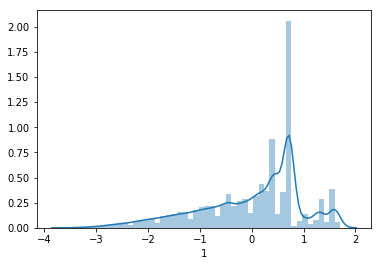

In [0]:
sln.distplot(comb['1'])

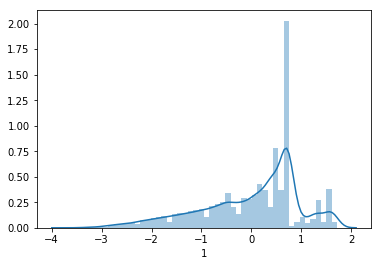

In [0]:
sln.distplot(comb_test['1'])

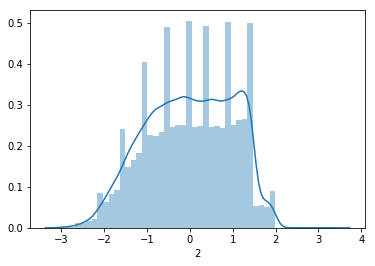

In [0]:
sln.distplot(comb['2'])

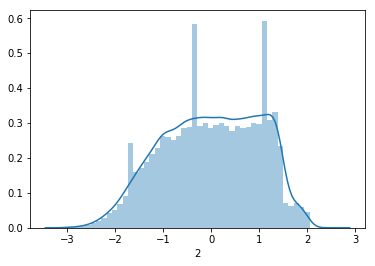

In [0]:
sln.distplot(comb_test['2'])

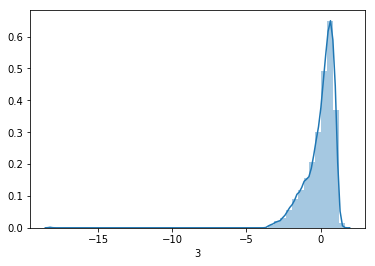

In [0]:
sln.distplot(comb_test['3'])

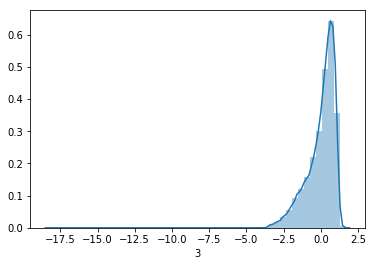

In [0]:
sln.distplot((comb['3']))

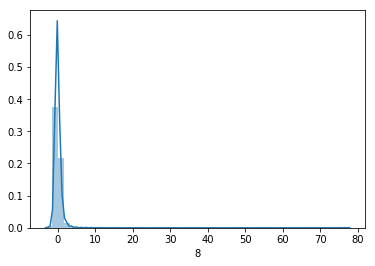

In [0]:
sln.distplot(comb['8'])

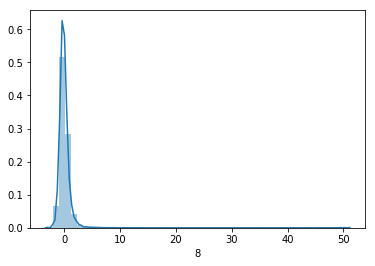

In [0]:
sln.distplot(comb_test['8'])

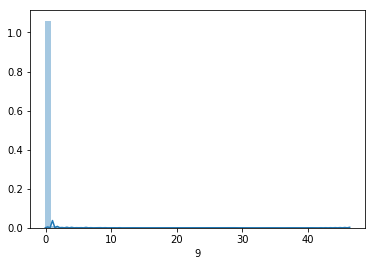

In [0]:
sln.distplot(comb_test['9'])

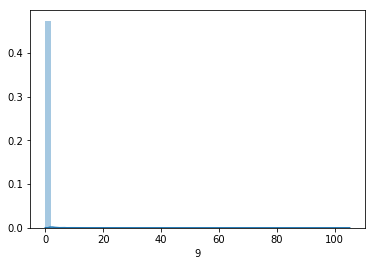

In [0]:
sln.distplot(comb['9'])

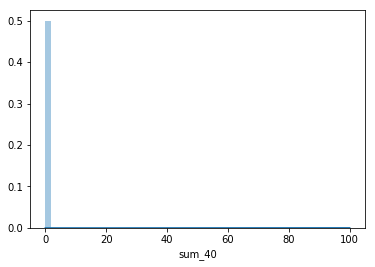

In [0]:
#drop column 9 and column 5 and sum 40
sln.distplot(((comb['sum_40'])*10)**2)

In [0]:
comb=comb.drop(['sum_40','9','5'],axis=1)

In [0]:
comb_test=comb_test.drop(['sum_40','9','5'],axis=1)

In [0]:
comb['m13']=train['m13']

In [0]:
comb['m13'].value_counts()

0    115422
1       636
Name: m13, dtype: int64

In [0]:
# Lets shuffle the data before creating the subsamples

comb = comb.sample(frac=1)

In [0]:
defaulted = comb.loc[comb['m13'] == 1]
non_defaulted = comb.loc[comb['m13'] == 0][:636]

In [0]:
normal_distributed_df = pd.concat([defaulted, non_defaulted])


In [0]:
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

In [0]:
new_df[['1','2','3','5','8','9','sum_40','m13']].corr()

,1,2,3,5,8,9,sum_40,m13
1,1.000000,0.093302,-0.101983,0.079522,-0.225075,0.073591,0.048192,0.138405
2,0.093302,1.000000,-0.244380,0.150043,-0.677387,0.147001,0.058289,0.272489
3,-0.101983,-0.244380,1.000000,-0.234614,0.206016,-0.249864,-0.062319,-0.474855
5,0.079522,0.150043,-0.234614,1.000000,-0.143675,0.905814,0.641041,0.368084
8,-0.225075,-0.677387,0.206016,-0.143675,1.000000,-0.132111,-0.060979,-0.255106
9,0.073591,0.147001,-0.249864,0.905814,-0.132111,1.000000,0.734352,0.331775
sum_40,0.048192,0.058289,-0.062319,0.641041,-0.060979,0.734352,1.000000,0.105493
m13,0.138405,0.272489,-0.474855,0.368084,-0.255106,0.331775,0.105493,1.000000


In [0]:
# # -----> 3 Removing Outliers (Highest Negative Correlated with Labels)
col3_fraud = new_df['3'].loc[new_df['m13'] == 1].values
q25, q75 = np.percentile(col3_fraud, 25), np.percentile(col3_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
col3_iqr = q75 - q25
print('iqr: {}'.format(col3_iqr))

col3_cut_off = col3_iqr * 1.5
col3_lower, col3_upper = q25 - col3_cut_off, q75 + col3_cut_off
print('Cut Off: {}'.format(col3_cut_off))
print('3 Lower: {}'.format(col3_lower))
print('3 Upper: {}'.format(col3_upper))

outliers = [x for x in col3_fraud if x < col3_lower or x > col3_upper]
print('Feature 3 Outliers for Fraud Cases: {}'.format(len(outliers)))

Quartile 25: -2.29627042472704 | Quartile 75: -0.2351730572770056
iqr: 2.0610973674500346
Cut Off: 3.0916460511750516
3 Lower: -5.387916475902092
3 Upper: 2.856472993898046
Feature 3 Outliers for Fraud Cases: 1


In [0]:
# -----> 5 removing outliers from fraud transactions
col5_fraud = new_df['5'].loc[new_df['m13'] == 1].values
q25, q75 = np.percentile(col5_fraud, 25), np.percentile(col5_fraud, 75)
col5_iqr = q75 - q25

col5_cut_off = col5_iqr * 1.5
col5_lower, col5_upper = q25 - col5_cut_off, q75 + col5_cut_off
print('col5 Lower: {}'.format(col5_lower))
print('col5 Upper: {}'.format(col5_upper))
outliers = [x for x in col5_fraud if x < col5_lower or x > col5_upper]
print('col5 outliers: {}'.format(outliers))
print('Feature col5 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['5'] > col5_upper) | (new_df['5'] < col5_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

col5 Lower: -8.466210864516755
col5 Upper: 13.989614952983471
col5 outliers: [16.796593180171, 44.86637545204629, 16.796593180171, 16.796593180171, 16.796593180171, 28.02450608892112, 56.0942883607964, 16.796593180171, 28.02450608892112, 16.796593180171, 22.41054963454606, 33.63846254329618, 39.25241899767124, 22.41054963454606, 33.63846254329618, 61.70824481517146, 22.41054963454606, 16.796593180171, 16.796593180171, 28.02450608892112, 16.796593180171, 56.0942883607964, 22.41054963454606, 78.55011417829662, 56.0942883607964, 16.796593180171, 16.796593180171, 33.63846254329618, 33.63846254329618, 33.63846254329618, 39.25241899767124, 39.25241899767124, 44.86637545204629, 16.796593180171, 56.0942883607964, 22.41054963454606, 22.41054963454606, 33.63846254329618, 22.41054963454606, 61.70824481517146, 16.796593180171, 28.02450608892112, 39.25241899767124, 33.63846254329618, 50.48033190642135, 33.63846254329618, 16.796593180171, 16.796593180171, 28.02450608892112, 16.796593180171, 22.41054

In [0]:
# -----> 5 removing outliers from fraud transactions
col9_fraud = new_df['9'].loc[new_df['m13'] == 1].values
q25, q75 = np.percentile(col9_fraud, 25), np.percentile(col9_fraud, 75)
col9_iqr = q75 - q25

col9_cut_off = col9_iqr * 1.5
col9_lower, col9_upper = q25 - col9_cut_off, q75 + col9_cut_off
print('col9 Lower: {}'.format(col9_lower))
print('col9 Upper: {}'.format(col9_upper))
outliers = [x for x in col9_fraud if x < col9_lower or x > col9_upper]
print('col9 outliers: {}'.format(outliers))
print('Feature col9 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['9'] > col5_upper) | (new_df['9'] < col9_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

col9 Lower: -4.696522163964958
col9 Upper: 7.683108976644068
col9 outliers: [8.198926940836111, 9.230562869220195, 25.736737723365565, 18.51528622467697, 11.293834725988367, 23.673465866597397, 11.293834725988367, 9.230562869220195, 13.357106582756538, 15.420378439524713, 12.325470654372456, 11.293834725988367, 10.262198797604283, 9.230562869220195, 35.02146107882233, 14.388742511140626, 9.230562869220195, 11.293834725988367, 21.610194009829225, 8.198926940836111, 8.198926940836111, 35.02146107882233, 29.863281436901907, 10.262198797604283, 8.198926940836111, 13.357106582756538, 11.293834725988367, 8.198926940836111, 12.325470654372456, 10.262198797604283, 10.262198797604283, 15.420378439524713, 9.230562869220195, 15.420378439524713, 10.262198797604283, 12.325470654372456, 12.325470654372456, 9.230562869220195, 12.325470654372456, 9.230562869220195, 14.388742511140626, 8.198926940836111, 8.198926940836111, 20.578558081445134, 14.388742511140626, 24.70510179498148, 8.198926940836111, 11

In [0]:
X = new_df.drop('m13', axis=1)
y = new_df['m13']

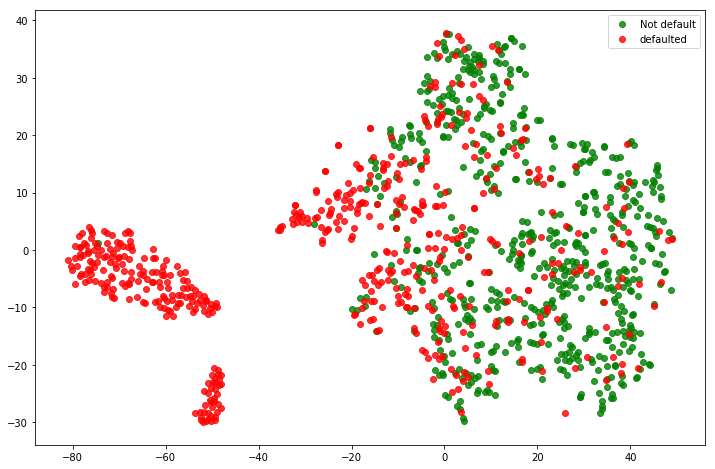

In [0]:
tsne_plot(X,y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [0]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}


In [0]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 81.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 78.0 % accuracy score
Classifiers:  SVC Has a training score of 81.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 73.0 % accuracy score


In [0]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [0]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  81.54%
Knears Neighbors Cross Validation Score 76.74%
Support Vector Classifier Cross Validation Score 80.58%
DecisionTree Classifier Cross Validation Score 80.58%


In [0]:
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter

In [0]:
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values


Train: [ 217  219  221  222  223  225  228  229  230  231  233  235  239  240
  241  242  248  249  254  255  256  257  258  259  260  261  262  263
  264  265  266  267  268  269  270  271  272  273  274  275  276  277
  278  279  280  281  282  283  284  285  286  287  288  289  290  291
  292  293  294  295  296  297  298  299  300  301  302  303  304  305
  306  307  308  309  310  311  312  313  314  315  316  317  318  319
  320  321  322  323  324  325  326  327  328  329  330  331  332  333
  334  335  336  337  338  339  340  341  342  343  344  345  346  347
  348  349  350  351  352  353  354  355  356  357  358  359  360  361
  362  363  364  365  366  367  368  369  370  371  372  373  374  375
  376  377  378  379  380  381  382  383  384  385  386  387  388  389
  390  391  392  393  394  395  396  397  398  399  400  401  402  403
  404  405  406  407  408  409  410  411  412  413  414  415  416  417
  418  419  420  421  422  423  424  425  426  427  428  429  430  431

In [0]:
# We will undersample during cross validating
undersample_X = comb.drop('m13', axis=1)
undersample_y = comb['m13']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

Train: [ 21164  21253  21396 ... 116055 116056 116057] Test: [    0     1     2 ... 23221 23222 23223]
Train: [     0      1      2 ... 116055 116056 116057] Test: [21164 21253 21396 ... 46424 46425 46426]
Train: [     0      1      2 ... 116055 116056 116057] Test: [46159 46413 46427 ... 70962 70976 71003]
Train: [     0      1      2 ... 116055 116056 116057] Test: [69626 69627 69628 ... 93502 93704 93963]
Train: [    0     1     2 ... 93502 93704 93963] Test: [ 92842  92843  92844 ... 116055 116056 116057]


In [0]:
# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

NearMiss Label Distribution: Counter({0: 636, 1: 636})


IndexError: ignored